
# Problem
Find $u$ such that
$$
-\Delta u + qu = f
$$
with
$$
\nabla u \cdot n = g
$$
on the boundary.
Take $q$ to be a positive constant and $f$ a continuous function.
Here, $n$ is the outward normal on the boundary of $\Omega$ and $\Omega$ is a polygonal domain in $\mathbb R^2$.
Also, $g$ is given boundary data that is continuous.




# Weak formulation
We multiply the PDE by a test function $v$ and integrate by parts.
Using the boundary data gives us the following variational equation
$$
\int_\Omega \nabla u \cdot \nabla v + quv\,dx = \int_\Omega fv\,dx + \int_{\partial \Omega} gv\,ds.
$$




# Discretization
We partition $\Omega$ into a mesh $\mathcal T_h$ consisting of triangles and we take our approximation space $V_h$ to be the collection continuous functions on $\Omega$ that are piecewise degree 1 polynomials on each triangle $K$ in the mesh $\mathcal T_h$.
Using the Galerkin method, our discrete problem is to find $u_h \in V_h$ such that
$$
\int_\Omega \nabla u_h\cdot \nabla v_h + qu_hv_h\,dx = \int_\Omega fv_h\,dx + \int_{\partial \Omega}gv_h\,ds
$$
for all $v_h \in V_h$.




# Basis
A basis for $V_h$ can be constructed using the nodal basis functions at the vertices of each triangle in the mesh.
We start with the reference triangle $\widehat K$ with vertices $\widehat v_1 = (0,0)$, $\widehat v_2 = (1,0)$, and $\widehat v_3 = (0,1)$.
The nodal basis on the reference triangle is then given by the functions
$$
\widehat\varphi_1(\widehat x) = 1-\widehat x_1-\widehat x_2 \\
\widehat\varphi_2(\widehat x) = \widehat x_1 \\
\widehat \varphi_3(\widehat x) = \widehat x_2
$$
where each basis function $\widehat\varphi_i$ takes the value $1$ at vertex $\widehat v_i$ and takes the value $0$ at the other vertices.




# Mapping
We transfer these basis functions onto a physical triangle $K$ in the mesh by the means of a reference mapping $T_K : \widehat K \to K$.
Such a map is affine linear and is uniquely determined by specifying which of the vertices $v_i$ of $K$ that the reference vertices $\widehat v_i$ map onto.
Explicitly, the formula for $T_K$ is given by
$$
T_K(\widehat x) = v_1 + B_K\widehat x
$$
where $B_K$ is the $2\times 2$ matrix with column $1$ given by $v_2 - v_1$ and column $2$ given by $v_3 - v_1$.
Therefore, we have that
$$
DT_K = B_K,
$$
where $DT_K$ is the Jacobian of $T_K$.
Since this is a constant matrix, we have the following change-of-variables formula for any function $f$ on $K$:
$$
\int_K f(x)\,dx = |\det B_K| \int_{\widehat K}f(T_K(\widehat x))\,d\widehat x.
$$

By the chain rule, we have that
$$
\nabla(f \circ T_K) = ((\nabla f) \circ T_K) B_K,
$$
so that
$$
(\nabla f) \circ T_K = \nabla (f\circ T_K)B_K^{-1}.
$$
This gives us the following change-of-variables for the gradient of a function $f$,
$$
\int_K\nabla f\,dx = |\det B_K|\int_{\widehat K}(\nabla f)\circ T_K\,d\widehat x = |\det B_K|\int_{\widehat K}\nabla (f\circ T_K)B_K^{-1}\,d\widehat x.
$$




# Quadrature
Similar to the 1d case, one can construct quadrature rules in higher dimensions that are exact for polynomials of a certain degree and which give good approximations otherwise.
The details of doing so is beyond the scope of this course, but we will shamelessly use certain quadrature rules that are cooked up on the reference triangle and which are sufficiently accurate for our purposes.
We get our points and weights from [here](https://people.sc.fsu.edu/~jburkardt/datasets/quadrature_rules_tri/quadrature_rules_tri.html).
All the quadrature rules are of the form
$$
\int_{\widehat K}f(\widehat x)\,d\widehat x \approx \sum_q \frac{w_q}{2}f(\widehat x_q)
$$
where the $w_q$ and $\widehat x_q$ are the quadrature points and weights as found at the website.


# Physical basis
Under the reference mapping, the physical basis functions $\varphi_{K,i}$ on triangle $K$ are defined so that
$$
\varphi_{K,i}(T_K(\widehat x)) = \widehat\varphi_i(\widehat x)
$$
for each $i$ and each $\widehat x \in \widehat K$.
We use these local basis functions to construct the global functions by gluing them together along common edges and vertices shared between cells.
More precisely, at a global vertex $v$ in the mesh, we let $\mathcal T_{h,v}$ denote the collection of triangles that share $v$ as a vertex.
Then for each $K \in \mathcal T_{h,v}$, we let $\varphi_{v,K}$ be the physical basis function that is $1$ at vertex $v \in K$ and is $0$ at the other vertices of $K$.
Then the global basis function $\varphi_v$ is defined piecewise on each cell by setting $\varphi_v|_K = \varphi_{v,K}$ if $K \in \mathcal T_{h,v}$ and setting $\varphi_v|_K = 0$ otherwise.
A picture of such a basis function is given [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FBasis-functions-for-piecewise-linear-finite-element-in-2D_fig2_2804104&psig=AOvVaw2RZQHtqvO_1H4eaG49tYV7&ust=1711056905776000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCJDz_uvlg4UDFQAAAAAdAAAAABAE).
Thus, we have as many basis functions as we have vertices in our mesh, and any function $u_h \in V_h$ can be uniquely written as
$$
u_h = \sum_{v\in\mathcal V_h}u_h(v)\varphi_v
$$
where $\mathcal V_h$ denotes the set of vertices in the mesh.


# Matrix system
Now we enumerate the vertices of our mesh as $v_1,\dots,v_{N_h}$, so that we order the basis functions in the same way.
Then the matrix-vector system that we arrive at from this enumeration is to find a vector $\vec u$ such that
$$
A_h\vec u = \vec b_h
$$
where
$$
(A_h)_{i,j} = \int_\Omega\nabla\varphi_j\cdot\nabla\varphi_i+q\varphi_j\varphi_i\,dx
$$
and
$$
(\vec b_h)_i = \int_\Omega f\varphi_i\,dx + \int_{\partial\Omega}g\varphi_i\,dx
$$
for all $i,j$.

We can break these up into 4 terms: the mass matrix term
$$
q(M_h)_{i,j} = q\int_\Omega \varphi_j\varphi_i\,dx,
$$
the stiffness matrix term
$$
(S_h)_{i,j} = \int_\Omega\nabla\varphi_j\cdot\nabla\varphi_i\,dx,
$$
the source term
$$
(\vec f_h)_i = \int_\Omega f\varphi_i\,dx,
$$
and the boundary term
$$
(\vec g_h)_i = \int_\Omega g\varphi_i\,dx.
$$


# Assembly
To assemble this system, we loop over all the cells, determine which local basis functions contribute to which entries in the global system, and compute some integrals.
What makes this different from the 1d setting is that we no longer have a natural ordering of mesh cells or mesh vertices, so it is not as easy to describe which entries each cell contributes to.
It is still possible, however.
We just need to introduce some local-to-global enumerations.

# Enumerations
We enumerate the vertices as $v_1,\dots,v_{N_h}$ and we enumerate the cells as $K_1,\dots,K_{M_h}$.
Each cell $K = K_j$ contains 3 vertices $v_{K,1},v_{K,2},v_{K,3}$, which we may also label as $v_{j,1},v_{j,2},v_{j,3}$.
Using these enumerations, we can define a cellwise local-to-global enumeration of the vertices $I_{h,cell}$ which is represented by a $M_h \times 3$ matrix with entry $(I_{h,cell})_{k,m}$ being the unique global index $i = i(k,m)$ such the $i$th globall enumerated vertex corresponds with the $m$th locally enumerated vertex on cell $k$.

Using these local enumerations, the local basis functions on cell $K = K_k$ can be written as $\varphi_{k,m} = \varphi_{K,m}$.
Similarly, the global basis function associated to vertex $v = v_i$ can be written as $\varphi_i = \varphi_{v}$.




# Supports
Using these local-to-global enumerations, we can assemble the mass matrix term as follows:
$$
(M_h)_{i,j} = \sum_{k=1}^{M_h}\int_{K_k}\varphi_j\varphi_i\,dx.
$$
On cell $K_k$, the only global basis functions $\varphi_i$ that have support on $K_k$ are those with global indices $i = i(k,1)$, $i = i(k,2)$, and $i = i(k,3)$, where here we use the local-to-global enumeration $I_{h,cell}$ from above.
Thus, for the local mass matrix contribution
$$
(M_h)_{i,j}^k = \int_{K_k}\varphi_j\varphi_i\,dx,
$$
there are only 9 nonzero entries: those with $i,j \in \{i(k,1), i(k,2), i(k,3)\}$.

The same also holds for the stiffness matrix and the source term.
We can break them up as
$$
(A_h)_{i,j} = \sum_k (A_h)_{i,j}^k
$$
with
$$
(A_h)_{i,j}^k = \int_{K_k}\nabla\varphi_j\cdot\nabla\varphi_i\,dx
$$
and
$$
(\vec f_h)_i = \sum_k (\vec f_h)_i^k
$$
with
$$
(\vec f_h)_i^k = \int_{K_k}f\varphi_i\,dx
$$
and the only nonzero entries in the local cell contribution are when $i,j \in \{i(k,1),i(k,2),i(k,3)\}$.




# Computing the local mass matrix
For $i = i(k,l)$ and $j = i(k,m)$, we have that $\varphi_i|_{K_k} = \varphi_{k,l}$ and $\varphi_j|_{K_k} = \varphi_{k,m}$, where $i$ and $j$ are the global indices whereas $l = l(i,k)$ and $m = m(j,k)$ are the local indices of the $i$th and $j$th global basis functions with respect to the $k$th cell respectively.
We also recall that
$$
\varphi_{k,l}\circ T_k = \widehat\varphi_l \\
\varphi_{k,m}\circ T_k = \widehat\varphi_m,
$$
where $T_k$ is the reference map from $\widehat K$ to $K_k$ defined above.

Therefore, by changing coordinates back to the reference element, we have that
$$
(M_h)_{i,j}^k = \int_{K_k}\varphi_{k,m}\varphi_{k,l}\,dx = |\det B_k|\int_{\widehat K}\widehat\varphi_m\widehat\varphi_l\,d\widehat x,
$$
where we recall that $B_k$ is the matrix formed from the vertices of the triangle as above.
Now we can approximate this integral using one of the quadrature rules discussed above to get
$$
(M_h)_{i(k,l),j(k,m)}^k = \frac{|\det B_k|}{2}\sum_qw_q\widehat\varphi_{m}(\widehat x_q)\widehat\varphi_{l}(\widehat x_q),
$$
provided that we choose a quadrature rule that integrates quadratic polynomials in 2 variables exactly.

# Computing the local stiffness matrix
Computing the local stiffness matrix is similar to the mass matrix.
We use the same local-to-global indices as above.
Then, by using the change-of-variables formulas for a gradient as discussed above, we have that
$$
(S_h)_{i(k,l),j(k,m)}^k = \sum_pw_p\frac{|\det B_k|}{2}\left((\nabla \widehat\varphi_m)B_k^{-1}\right) \cdot \left((\nabla \widehat\varphi_l)B_k^{-1}\right),
$$
where the integral actually simplifies completely in this case since the gradients of the degree 1 polynomial basis functions are constants as well as the matrix $B_k$.

# Computing the local source term
Similar to the previous terms, we have that
$$
(\vec f_h)_{i(k,l)}^k \approx \frac{|\det B_k|}{2}\sum_qw_qf(T_k(\widehat x_q))\widehat \varphi_l(\widehat x_q)
$$
though now since we only know that $f$ is a continuous function, and not necessarily a polynomial, we cannot guarantee equality.
For this reason, it may be a good idea to pick a higher order quadrature to help reduce the error introduced by this approximation.

# Computing the boundary term

For the boundary term, we also need the collection $\mathcal E_h^\partial$ of edges of cells that lie on the boundary of $\Omega$.
For each edge $e \in \mathcal E_h^\partial$, there is a unique cell $K_e$ such that $e = K_e \cap \partial \Omega$.
Furthermore, there are also exactly two vertices $v_{e,1}$ and $v_{e,2}$ such that $e$ is the edge connecting $v_{e,1}$ to $v_{e,2}$.

By fixing an enumeration of the boundary edges as $e_1,\dots,e_{L_h}$, we can also define an edgewise local-to-global enumeration of the vertices that lie on the boundary as an $L_h \times 2$ matrix $I_{h,edge}$ whose $(l,n)$ entry is the unique global index $i = i(l,n)$ such that the $i$th globally enumerated vertex $v$ corresponds with the $n$th locally enumerated vertex on the $l$th boundary edge.

On boundary edge $e$ that belongs to cell $K_e$, there are only two local basis functions on $K_e$ that are nonzero when restricted to $e$, namely, the two basis functions associated to vertex $v_{e,1}$ and $v_{e,2}$ respectively.
We denote these basis functions as $\varphi_{e,1}$ and $\varphi_{e,2}$ respectively.
Using the unit interval $[0,1]$, we can parameterize $e$ from vertex $v_{e,1}$ to vertex $v_{e,2}$ with the edge reference map
$$
T_e(\widehat s) = v_{e,1}(1-\widehat s) + v_{e,2}\widehat s
$$
Furthermore, we have that
$$
\varphi_{e,1}|_e(T_e(\widehat s)) = 1-\widehat s := \widehat \psi_1(s)\\
\varphi_{e,2}|_e(T_e(\widehat s)) = \widehat s := \widehat \psi_2(s)
$$

We split up the boundary term as
$$
(\vec g_h)_i = \sum_l (\vec g_h)_i^l
$$
where
$$
(\vec g_h)_i^l = \int_{e_l} g\varphi_i\,ds
$$
is the local contribution from boundary edge $e_l$.
For the local term, there are only two basis functions that are nonzero on $e_l$, and they are the ones whose indices $i \in \{i(l,1),i(l,2)\}$, where we use the local-to-global enumeration of the basis functions with respect to the boundary edges.
For $i = i(l,n)$, we have from the definition of a line integral with respect to the parameterization $T_{e_l}$ above and the local basis functions that
$$
(\vec g_h)_{i(l,n)}^l = \int_0^1 g(T_{e_l}(\widehat s))\varphi_{e_l,n}(T_{e_l}(\widehat s))|T_{e_l}'|\,d\widehat s,
$$
where $|T_{e_l}'|$ is the length of the vector
$$
T_{e_l}' = v_{e_l,2} - v_{e_l,1},
$$
i.e. the length of the edge $e$.
Therefore, by using a standard 1d quadrature rule on the unit interval,
$$
(\vec g_h)_{i(l,n)}^l = |T_{e_l}'|\int_0^1 g(T_{e_l}(\widehat s))\widehat \psi_n\,d\widehat s \approx |T_{e_l}'|\sum_q \widetilde w_qg(T_{e_l}(\widehat s_q))\widehat\psi_n(\widehat s_q)
$$
where the weights and points $\widetilde w_q, \widehat s_q$ are 1d Gauss quadrature points on the unit interval.
Such points can be found [here](https://en.wikipedia.org/wiki/Gaussian_quadrature), but they must first be mapped from the interval $[-1,1]$ to $[0,1]$.
Once again, since $g$ is only continuous but not necessarily a polynomial, we cannot guarantee equality.
For that reason, one should pick a sufficiently high order 1d quadrature rule.


# Data structures needed
We see that, in contrast to a 1d code, we need quite a bit more structure in order to do our computations and assembly.
For example, we need

1. a data structure for the vertices,
2. a data structure for the cells,
3. a data structure for the edges,
4. a data structure for the local-to-global enumerations,
5. a way to determine which edges and their corresponding vertices lie on the boundary of the domain,
6. quadrature rules for cells and for edges,
7. reference mapping information for cells and edges,
8. methods to evaluate the data at points, and
9. the basis functions on the reference triangle and reference interval,

among other things.
We also need a way to invert the matrix system to get the approximate solution as well as a way to compute and tabulate errors.
We also want to do some visualization.

We now proceed with the implementation.

# The mesh
Mesh generation is itself an active research topic and beyond the scope of this course.
We will not delve into any details for writing our own mesh generation algorithms, but instead we will rely on an external library to do the work for us.
The library that we will use is called Triangle, and is originally written in C.
The website for the original C program can be found [here](https://www.cs.cmu.edu/~quake/triangle.html).

We will not use Triangle directly, but instead we will make use of [MeshPy](https://documen.tician.de/meshpy/index.html), a Python wrapper that allows us to use Python code to call Triangle to make our mesh for us.
If you are using colab to write your code, then you can just do the following to install the package and its dependencies.

In [ ]:
!pip install pybind11
!pip install meshpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gmsh-interop: filename=gmsh_interop-2021.1.1-py2.py3-none-any.whl size=21976 sha256=4512df1b97a0772a4738b96f0538a7fc89981651a4fd6cd9b9293db02268592d
  Stored in directory: /root/.cache/pip/wheels/e2/4a/7a/e7f339b73bce235977f6dddb4890fb3e4f28e5d172de0c78b2
Successfully built gmsh-interop


# Using Triangle through MeshPy
To use Triangle, we need to provide the bare-minimum geometry information, the desired mesh size, and the desired options that we wish the mesh generator to use.
The snippet below shows how to do this for the two meshes in the assignment: the unit square and the unit square with a hole.

Before we dive into the snippets, we do a quick calculation that will be needed below.
In [this note](https://jordanhoffart.github.io/teaching/sp24m610/notes/area-triangle.pdf) that I have on my website, I show that for a triangle $K$ of diameter $h$ and smallest angle $\theta_0$, its area $A$ is bounded below by
$$
A \geq \frac{1}{4}h^2\tan\theta_0.
$$
Therefore, if $\theta_0 \geq \theta_{min}$ and $A \leq A_{max}$, we have that
$$
h \leq 2\sqrt{A_{max}\cot\theta_{min}}.
$$
If we then set
$$
A_{max} = \frac{\tan\theta_{min}}{4}h_{max}^2
$$
we can guarantee that
$$
h \leq h_{max}.
$$

In [ ]:
import meshpy.triangle as triangle
import math

# we first write a function to compute the max_area that we should set if we
# want our cell diameters to be bounded by max_diameter and if we are also
# imposing a min_angle condition
def compute_max_area(max_diameter, min_angle=20):
    return math.tan(min_angle * math.pi / 180) / 4 * max_diameter**2

# now we make a mesh of the unit square
def make_mesh_square(max_diameter, min_angle=20):
    # we first compute the max_area
    max_area = compute_max_area(max_diameter, min_angle)

    # then we provide the list of the 4 vertices of the square
    points = [(0,0),(1,0),(1,1),(0,1)]

    # now we provide the edges
    # an edge is a pair of indices [i,j] that says that vertices[i] is connected
    # to vertices[j]
    edges = [[0,1],[1,2],[2,3],[3,0]]

    # now we instantiate a MeshInfo class and set our points and edges (facets)
    mesh_info = triangle.MeshInfo()
    mesh_info.set_points(points)
    mesh_info.set_facets(edges)

    # finally, we build our mesh with the max_area (max_volume) and min_angle
    # constraint
    # this will give us a mesh of the unit square where every cell has
    # diameter less than max_diameter
    return triangle.build(mesh_info,max_volume=max_area,min_angle=min_angle)

# now we make a mesh of the square with a hole in it
# the procedure is similar, but now we also provide the vertices and edges
# surrounding the hole
def make_mesh_hole(max_diameter, min_angle=20):
    max_area = compute_max_area(max_diameter, min_angle)

    points = [(0,0),(1,0),(1,1),(0,1),
              (0.25,0.25),(0.75,0.25),(0.75,0.75),(0.25,0.75)]

    edges = [[0,1],[1,2],[2,3],[3,0],
             [4,5],[5,6],[6,7],[7,4]]

    # we specify holes by providing a point that lies inside the hole
    holes = [(0.5,0.5)]

    mesh_info = triangle.MeshInfo()
    mesh_info.set_points(points)
    mesh_info.set_facets(edges)
    mesh_info.set_holes(holes)

    return triangle.build(mesh_info,max_volume=max_area,min_angle=min_angle)

Now that we know how to make a mesh, let us see how we can extract the relevant mesh information that we need for our problem.

In [ ]:
import numpy as np

# we can extract the mesh points, mesh cells, and boundary edges as follows
mesh = make_mesh_square(1/10)
vertices = np.array(mesh.points)
cells = np.array(mesh.elements)
boundary_edges = np.array(mesh.facets)

print('vertices:')
print(vertices[:10,:])
print('cells:')
print(cells[:10,:])
print()
print('boundary edges:')
print(boundary_edges[:10,:])

vertices:
[[0.         0.        ]
 [1.         0.        ]
 [1.         1.        ]
 [0.         1.        ]
 [0.5        0.5       ]
 [0.         0.5       ]
 [0.08396072 0.3263326 ]
 [0.25       0.5       ]
 [0.20074183 0.48675817]
 [0.16396484 0.41930339]]
cells:
[[223 173 170]
 [ 48  44  79]
 [207 150 105]
 [ 53  27  47]
 [ 13  31  21]
 [ 27  50  47]
 [  8 126 127]
 [108 110 127]
 [128 127  74]
 [ 29  35  40]]

boundary edges:
[[  1 680]
 [  2 886]
 [  3 485]
 [  0 186]
 [  5 262]
 [ 18  28]
 [ 12 454]
 [ 44  48]
 [ 48   5]
 [ 28  44]]


In [ ]:
# we see that cells and edges are 2d arrays of indices
# these are the indices of the vertices that make up the cell or edge respectively
# for example
cell_0 = cells[0]
print(cell_0)

[223 173 170]


In [ ]:
# cell_0 is composed of vertex_223, vertex_173, and vertex_170
cell_0_vertices = np.array([vertices[cell_0[0]], vertices[cell_0[1]], vertices[cell_0[2]]])
print(cell_0_vertices)

[[0.53827412 0.44105445]
 [0.55857055 0.47354374]
 [0.52483942 0.47692935]]


In [ ]:
# therefore, the vertices array and the cells array give us the local-to-global
# enumeration of the vertices that we need for assembly of the cell integrals
# here's one example of how we can use this

# to verify that all the cells in our mesh indeed have diameter less than 1/n,
# we write a function that lets us compute the mesh size
def compute_mesh_size(mesh):
    mesh_size = 0

    cells = mesh.elements
    vertices = mesh.points

    # we loop over all the cells, get the vertices of the cell, and use them to
    # compute the cell diameter
    for cell in cells:
        v0 = vertices[cell[0]]
        v1 = vertices[cell[1]]
        v2 = vertices[cell[2]]

        length0 = math.sqrt((v1[0]-v0[0])**2 + (v1[1]-v0[1])**2)
        length1 = math.sqrt((v2[0]-v1[0])**2 + (v2[1]-v1[1])**2)
        length2 = math.sqrt((v2[0]-v0[0])**2 + (v2[1]-v0[1])**2)

        cell_diameter = max(length0, length1, length2)

        # the mesh size is the largest cell diameter
        mesh_size = max(mesh_size, cell_diameter)

    return mesh_size

# let us compute a few mesh sizes
print("square")
for max_diameter in [1/10,1/20,1/40]:
    print("\tmesh size",compute_mesh_size(make_mesh_square(max_diameter)),"< max diameter",max_diameter)
print()
print("square with hole")
for max_diameter in [1/10,1/20,1/40]:
    print("\tmesh size",compute_mesh_size(make_mesh_hole(max_diameter)),"< max diameter",max_diameter)

square
	mesh size 0.06427270574598633 < max diameter 0.1
	mesh size 0.03328520094022671 < max diameter 0.05
	mesh size 0.01660066008435632 < max diameter 0.025

square with hole
	mesh size 0.06264673655198302 < max diameter 0.1
	mesh size 0.03264085627708242 < max diameter 0.05
	mesh size 0.017075241037697426 < max diameter 0.025


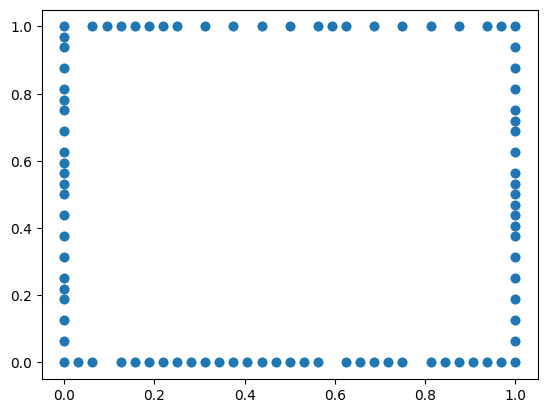

In [ ]:
# boundary_edges ONLY consists of those edges that lie on the boundary,
# which is exactly what we need
# to prove this, we plot the vertices of the segments and see that they lie on
# the boundary of the unit square
import matplotlib.pyplot as plt

xs = []
ys = []

for edge in boundary_edges:
    edge_vertices = [vertices[edge[0]], vertices[edge[1]]]
    xs.extend([vertex[0] for vertex in edge_vertices])
    ys.extend([vertex[1] for vertex in edge_vertices])

plt.scatter(xs, ys)
plt.show()


We see that by using the mesh data structures generated by Triangle, we have access to all of our data structures needed for vertices, cells, boundary edges, and local-to-global enumerations.
It remains to implement quadrature rules, reference maps, and basis functions.

# Quadrature rules
These are pretty straightforward.
We just use weights and points from the websites above and store them in some data structures.

In [ ]:
import math
import numpy as np

# 1d gauss quadrature on [-1,1]

# order 1
quad_wts_symmetric_1 = [2]
quad_pts_symmetric_1 = [0]

# order 2
quad_wts_symmetric_2 = [1, 1]
quad_pts_symmetric_2 = [1 / math.sqrt(3), -1 / math.sqrt(3)]

# order 3
quad_wts_symmetric_3 = [8 / 9, 5 / 9, 5 / 9]
quad_pts_symmetric_3 = [0, math.sqrt(3 / 5), -math.sqrt(3 / 5)]

# order 4
quad_wts_symmetric_4 = [
    (18 + math.sqrt(30)) / 36,
    (18 + math.sqrt(30)) / 36,
    (18 - math.sqrt(30)) / 36,
    (18 - math.sqrt(30)) / 36,
]
quad_pts_symmetric_4 = [
    math.sqrt(3 / 7 - 2 / 7 * math.sqrt(6 / 5)),
    -math.sqrt(3 / 7 - 2 / 7 * math.sqrt(6 / 5)),
    math.sqrt(3 / 7 + 2 / 7 * math.sqrt(6 / 5)),
    -math.sqrt(3 / 7 + 2 / 7 * math.sqrt(6 / 5)),
]

# order 5
quad_wts_symmetric_5 = [
    128 / 225,
    (322 + 13 * math.sqrt(70)) / 900,
    (322 + 13 * math.sqrt(70)) / 900,
    (322 - 13 * math.sqrt(70)) / 900,
    (322 - 13 * math.sqrt(70)) / 900,
]
quad_pts_symmetric_5 = [
    0,
    1 / 3 * math.sqrt(5 - 2 * math.sqrt(10 / 7)),
    -1 / 3 * math.sqrt(5 - 2 * math.sqrt(10 / 7)),
    1 / 3 * math.sqrt(5 + 2 * math.sqrt(10 / 7)),
    -1 / 3 * math.sqrt(5 + 2 * math.sqrt(10 / 7)),
]

quad_wts_symmetric = [
    quad_wts_symmetric_1,
    quad_wts_symmetric_2,
    quad_wts_symmetric_3,
    quad_wts_symmetric_4,
    quad_wts_symmetric_5,
]
quad_pts_symmetric = [
    quad_pts_symmetric_1,
    quad_pts_symmetric_2,
    quad_pts_symmetric_3,
    quad_pts_symmetric_4,
    quad_pts_symmetric_5,
]


# map to [0,1]
def map_quad_info(wts, pts):
    mapped_wts = [wt / 2 for wt in wts]
    mapped_pts = [pt / 2 + 1 / 2 for pt in pts]
    return mapped_wts, mapped_pts


# 1d quadrature on [0,1]
quad_wts_1d = []
quad_pts_1d = []
for i in range(5):
    mapped_wts, mapped_pts = map_quad_info(quad_wts_symmetric[i], quad_pts_symmetric[i])
    quad_wts_1d.append(mapped_wts)
    quad_pts_1d.append(mapped_pts)


# 2d quadrature on the unit triangle

# order 1 centroid
quad_wts_tri_1 = [1]
quad_pts_tri_1 = [np.array([1 / 3, 1 / 3])]

# order 2 strang1
quad_wts_tri_2 = [1 / 3, 1 / 3, 1 / 3]
quad_pts_tri_2 = [
    np.array([2 / 3, 1 / 6]),
    np.array([1 / 6, 2 / 3]),
    np.array([1 / 6, 1 / 6]),
]

# order 3 strang3
quad_wts_tri_3 = [-9 / 16, 25 / 48, 25 / 48, 25 / 48]
quad_pts_tri_3 = [
    np.array([1 / 3, 1 / 3]),
    np.array([3 / 5, 1 / 5]),
    np.array([1 / 5, 3 / 5]),
    np.array([1 / 5, 1 / 5]),
]

# order 4 strang5
quad_wts_tri_4 = [
    0.109951743655322,
    0.109951743655322,
    0.109951743655322,
    0.223381589678011,
    0.223381589678011,
    0.2233815896780118,
]
quad_pts_tri_4 = [
    np.array([0.816847572980459, 0.091576213509771]),
    np.array([0.091576213509771, 0.816847572980459]),
    np.array([0.091576213509771, 0.091576213509771]),
    np.array([0.108103018168070, 0.445948490915965]),
    np.array([0.445948490915965, 0.108103018168070]),
    np.array([0.445948490915965, 0.445948490915965]),
]

# order 5 strang7
quad_wts_tri_5 = [
    0.22500000000000000,
    0.12593918054482717,
    0.12593918054482717,
    0.12593918054482717,
    0.13239415278850616,
    0.13239415278850616,
    0.13239415278850616,
]
quad_pts_tri_5 = [
    np.array([0.33333333333333333, 0.33333333333333333]),
    np.array([0.79742698535308720, 0.10128650732345633]),
    np.array([0.10128650732345633, 0.79742698535308720]),
    np.array([0.10128650732345633, 0.10128650732345633]),
    np.array([0.05971587178976981, 0.47014206410511505]),
    np.array([0.47014206410511505, 0.05971587178976981]),
    np.array([0.47014206410511505, 0.47014206410511505]),
]

quad_wts_tri = [
    quad_wts_tri_1,
    quad_wts_tri_2,
    quad_wts_tri_3,
    quad_wts_tri_4,
    quad_wts_tri_5,
]
quad_pts_tri = [
    quad_pts_tri_1,
    quad_pts_tri_2,
    quad_pts_tri_3,
    quad_pts_tri_4,
    quad_pts_tri_5,
]


# Reference maps
Now we need the information for the reference maps in 1d and 2d.
We implement this below.

In [ ]:
import numpy as np

# denote the edge reference map by Te and the cell reference map by TK
# denote the derivative of Te by dTe and the Jacobian of TK by DTK

def Te(edge_vertices, s):
    # edge is a 2d array [v0,v1] of the vertices of the edge, i.e. a list of numpy arrays
    # v0 and v1 are vectors containing xy coordinates, i.e. numpy arrays
    # s is a scalar, i.e. a floating point number

    return edge_vertices[0] * (1 - s) + edge_vertices[1] * s


def len_dTe(edge_vertices):
    # compute |T'(s)| where T is the reference map from [0,1] to the edge
    # edge is a 2d array [v0,v1] of its vertices, i.e. a list of numpy arrays
    # v0 and v1 are vectors containing xy coordinates, i.e. numpy arrays

    # the length of the edge is just the norm of the vector pointing from v0 to v1
    return np.linalg.norm(edge_vertices[1] - edge_vertices[0])


def TK(cell_vertices, x):
    # cell is a 2d array [v0,v1,v2] of the vertices of the cell, i.e. a list of numpy arrays
    # the vi are vectors containing xy coordinates, i.e. numpy arrays
    # x is a vector, i.e. a numpy array

    # when numpy constructs a matrix from a list of vectors, it inserts each vector row-by-row by default
    # we want to construct our matrices column-by-column
    # we can do this by just taking a transpose
    return cell_vertices[0] + np.dot(
        np.array([cell_vertices[1] - cell_vertices[0], cell_vertices[2] - cell_vertices[0]]).transpose(), x
    )


def abs_det_DTK(cell_vertices):
    # compute |det DT|, where T is the reference map from the unit triangle to the cell and DT is its Jacobian
    # this amounts to computing the determinant of the matrix with columns [v1-v0,v2-v0]
    # cell is a 2d array [v0,v1,v2] of the vertices of the cell, i.e. a list of numpy arrays
    # the vi are vectors containing xy coordinates, i.e. numpy arrays

    return abs(
        np.linalg.det(np.array([cell_vertices[1] - cell_vertices[0], cell_vertices[2] - cell_vertices[0]]).transpose())
    )

def inv_DTK(cell_vertices):
    # compute the matrix inverse of DT, where T is the reference map from the unit triangle to the cell and DT is its Jacobian
    # this amounts to computing the inverse of the matrix with columns [v1-v0,v2-v0]
    # cell is a 2d array [v0,v1,v2] of the vertices of the cell, i.e. a list of numpy arrays
    # the vi are vectors containing xy coordinates, i.e. numpy arrays

    return np.linalg.inv(np.array([cell_vertices[1] - cell_vertices[0], cell_vertices[2] - cell_vertices[0]]).transpose())

# Basis functions
Now we implement the 1d basis functions on $[0,1]$ as well as the 2d functions on the unit triangle.


In [ ]:
import numpy as np

basis_1d = [lambda s: 1 - s, lambda s: s]
dbasis_1d = [-1, 1]

basis_2d = [lambda x: 1 - x[0] - x[1], lambda x: x[0], lambda x: x[1]]
grad_basis_2d = [np.array([-1, -1]), np.array([1, 0]), np.array([0, 1])]

# Code template
We now have all of the basic data structures needed to assemble our finite element system.
We assemble the system by looping over the cells, computing local entries, adding them to the global entries in the system, and then applying boundary conditions.
Then we use an external package to numerically solve the linear algebra system.
Then we do some postprocessing, meaning that we tabulate errors and produce plots.
Putting everything together should give us something like below.
What I provide below is an incomplete code template.
It is your job to fill in the details correctly.

## Sparse Matrices
Before presenting the full template, there is one last implementation detail to discuss.
Unlike 1d codes, the matrix systems in 2d and 3d codes can grow very large very fast.
From a computational point of view, we need special matrix data structures and numerical algorithms in order to tackle these larger problems.
One important aspect of finite element codes is that the underlying matrix systems are sparse, meaning that there are many more zero entries than nonzero entries.
By using data structures that only store and work on the nonzero entries of a matrix, it is possible to greatly reduce the amount of storage needed for our matrix system and greatly improve the computation time of algorithms.
For that reason, we will make use of the sparse matrix libraries from SciPy as found [here](https://docs.scipy.org/doc/scipy/reference/sparse.html).

## Code Organization
Since our 2d code is more complicated than our 1d code, we need to be a bit more organized with how we write it.
For this reason, unlike the script-style that I used with the 1d code, I will opt for a more modern code organization that utilizes functions and classes.
Any serious finite element library will have tens to hundreds of thousands of lines of code spread across many different files, so this is just a small taste of how things can be structured.
In fact, I would normally break up the following template into multiple files for organization, but since this is for educational purposes, it's easiest to keep things in one file.
You should only have to change the lines that I marked.
If you changed those lines correctly, the code should (hopefully) produce all of the output needed for the assignment.

problem 1
solving dofs = 910 h =  0.06427270574598633
solved


/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:293: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


solving dofs = 3444 h =  0.03160862252687021
solved
solving dofs = 13640 h =  0.016519963536321017
solved
dofs: 910 	h: 0.06427270574598633 	L2: nan 	L2rate: 0 	H1: nan 	H1rate: 0
dofs: 3444 	h: 0.03160862252687021 	L2: nan 	L2rate: nan 	H1: nan 	H1rate: nan
dofs: 13640 	h: 0.016519963536321017 	L2: nan 	L2rate: nan 	H1: nan 	H1rate: nan
problem 2 q = 1
solving dofs = 1119 h =  0.08838834764831845
solved


/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:293: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


solving dofs = 4328 h =  0.04419417382415922
solved
solving dofs = 17030 h =  0.02209708691207961
solved
problem 2 q = 0
solving dofs = 1119 h =  0.08838834764831845
solved
solving dofs = 4328 h =  0.04419417382415922
solved
solving dofs = 17030 h =  0.02209708691207961
solved
problem 3 manufactured solution
solving dofs = 710 h =  0.06264673655198302
solved


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

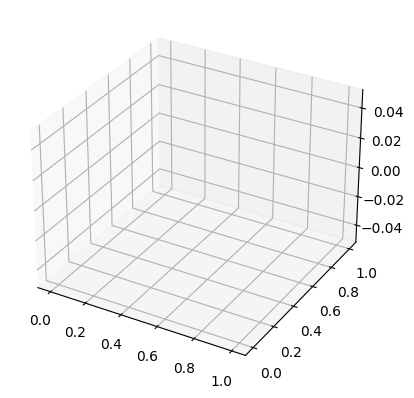

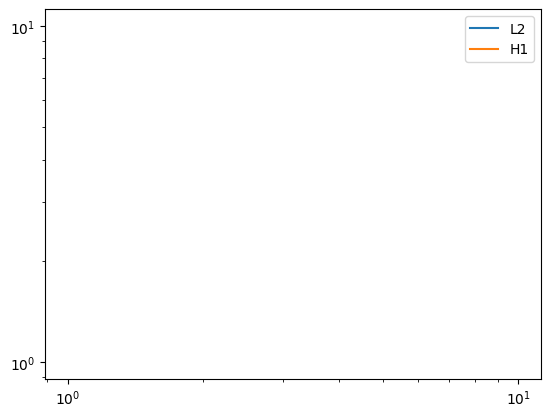

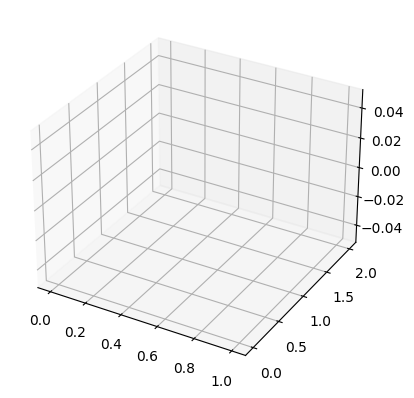

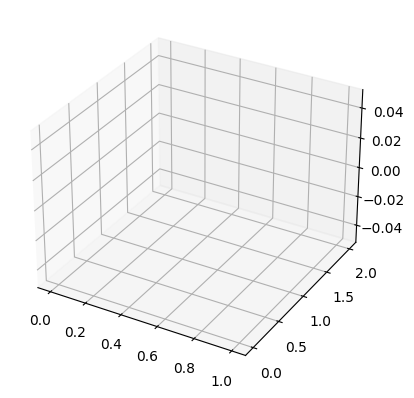

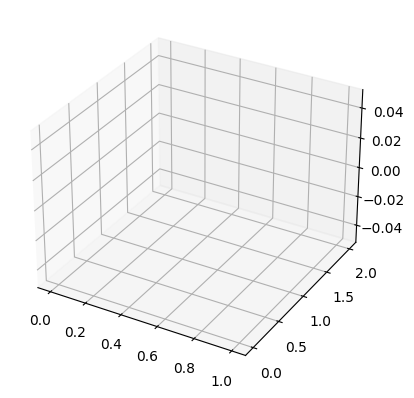

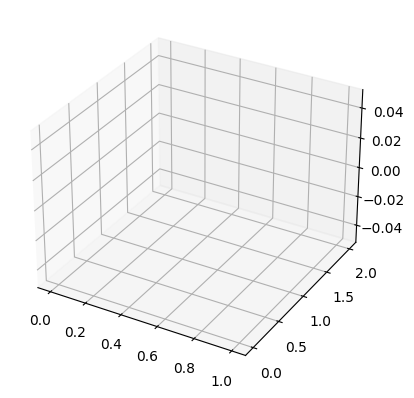

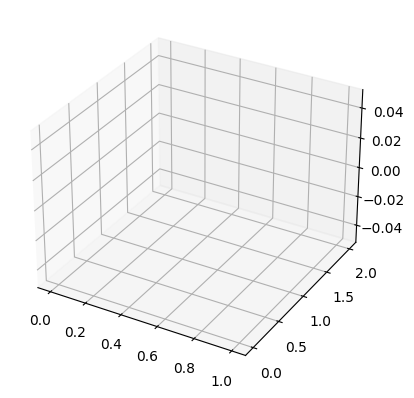

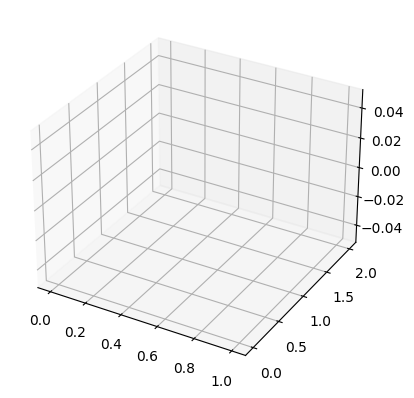

In [ ]:
"""
Find the lines that say FIXME and fix them.
"""

import meshpy.triangle as tr

import numpy as np
import scipy.sparse as ss
import scipy.sparse.linalg as ssl

import matplotlib.pyplot as plt
import pandas as pd

from typing import Callable


class ProblemData:
    def __init__(
        self,
        f: Callable[[np.ndarray], float],
        g: Callable[[np.ndarray], float],
        q: float,
    ) -> None:
        self.f: Callable[[np.ndarray], float] = f
        self.g: Callable[[np.ndarray], float] = g
        self.q: float = q


class Domain:
    def __init__(
        self,
        vertices: list[tuple[float, float]],
        edges: list[list[int]],
        holes: list[tuple[float, float]] | None = None,
    ) -> None:
        self.vertices: list[tuple[float, float]] = vertices
        self.edges: list[list[int]] = edges
        if holes is not None:
            self.holes: list[tuple[float, float]] = holes
        else:
            self.holes = []


def make_square() -> Domain:
    vertices: list[tuple[float, float]] = [(0, 0), (1, 0), (1, 1), (0, 1)]
    edges: list[list[int]] = [[0, 1], [1, 2], [2, 3], [3, 0]]
    return Domain(vertices, edges)


def make_polygon() -> Domain:
    vertices: list[tuple[float, float]] = [(0, 0), (0.5, 0), (1, 1), (0, 2)]
    edges: list[list[int]] = [[0, 1], [1, 2], [2, 3], [3, 0]]
    return Domain(vertices, edges)


def make_square_with_hole() -> Domain:
    vertices: list[tuple[float, float]] = [
        (0, 0),
        (1, 0),
        (1, 1),
        (0, 1),
        (0.25, 0.25),
        (0.75, 0.25),
        (0.75, 0.75),
        (0.25, 0.75),
    ]
    edges: list[list[int]] = [
        [0, 1],
        [1, 2],
        [2, 3],
        [3, 0],
        [4, 5],
        [5, 6],
        [6, 7],
        [7, 4],
    ]
    holes: list[tuple[float, float]] = [(0.5, 0.5)]
    return Domain(vertices, edges, holes)


def compute_max_area(max_mesh_size: float, min_angle_deg: float = 20) -> float:
    return np.tan(min_angle_deg * np.pi / 180) / 4 * max_mesh_size**2


def triangulate_domain(
    domain: Domain, max_mesh_size: float, min_angle_deg: float = 20
) -> tr.MeshInfo:
    info = tr.MeshInfo()
    info.set_points(domain.vertices)
    info.set_facets(domain.edges)
    info.set_holes(domain.holes)
    max_area = compute_max_area(max_mesh_size, min_angle_deg)
    return tr.build(info, max_volume=max_area, min_angle=min_angle_deg)


def refine_mesh(
    mesh: tr.MeshInfo, max_mesh_size: float, min_angle_deg: float = 20
) -> tr.MeshInfo:
    mesh.element_volumes.setup()
    max_area = compute_max_area(max_mesh_size, min_angle_deg)
    for i in range(len(mesh.elements)):
        mesh.element_volumes[i] = max_area
    return tr.refine(mesh, min_angle=min_angle_deg)


def get_local_vertices(mesh: tr.MeshInfo, local_indices: list[int]) -> list[np.ndarray]:
    return [np.array(mesh.points[i]) for i in local_indices]


def compute_mesh_size(mesh: tr.MeshInfo) -> float:
    mesh_size: float = 0
    for cell in mesh.elements:
        cell_vertices: list[np.ndarray] = get_local_vertices(mesh, cell)
        cell_vertices.append(cell_vertices[0])
        for i in range(len(cell_vertices) - 1):
            edge_length: float = float(
                np.linalg.norm(cell_vertices[i + 1] - cell_vertices[i])
            )
            mesh_size = max(mesh_size, edge_length)
    return mesh_size


class Quadrature2D:
    def __init__(self) -> None:
        self.points: list[np.ndarray] = [
            np.array([0.66666666666666666667, 0.16666666666666666667]),
            np.array([0.16666666666666666667, 0.66666666666666666667]),
            np.array([0.16666666666666666667, 0.16666666666666666667]),
        ]
        self.weights: list[float] = [1 / 3, 1 / 3, 1 / 3]
        self.size: int = len(self.points)

    def point(self, q: int) -> np.ndarray:
        return self.points[q]

    def weight(self, q: int) -> float:
        return self.weights[q]


class Basis2D:
    def __init__(self) -> None:
        self.n_basis_functions: int = 3

    def value(self, i: int, x: np.ndarray) -> float:
        return (i == 0) * (1 - x[0] - x[1]) + (i == 1) * x[0] + (i == 2) * x[1]

    def gradient(self, i: int) -> np.ndarray:
        return (
            (i == 0) * np.array([-1, -1])
            + (i == 1) * np.array([1, 0])
            + (i == 2) * np.array([0, 1])
        )


class Mapping2D:
    def __init__(self, mesh: tr.MeshInfo) -> None:
        self.mesh: tr.MeshInfo = mesh
        self.v0: np.ndarray = np.zeros(2)
        self.J: np.ndarray = np.zeros((2, 2))
        self.detJ: float = 0
        self.invJ: np.ndarray = np.zeros((2, 2))

    def reinit(self, cell: list[int]) -> None:
        v0: np.ndarray
        v1: np.ndarray
        v2: np.ndarray
        v0, v1, v2 = get_local_vertices(self.mesh, cell)

        self.v0: np.ndarray = v0
        self.J: np.ndarray = np.array([v1 - v0, v2 - v0]).transpose()
        self.invJ: np.ndarray = np.linalg.inv(self.J)
        self.detJ: float = abs(np.linalg.det(self.J))

    def map(self, x: np.ndarray) -> np.ndarray:
        return self.v0 + np.dot(self.J, x)

    def transform(self, gradient: np.ndarray) -> np.ndarray:
        return np.matmul(gradient, self.invJ)

    def JxW(self, weight: float) -> float:
        return self.detJ * weight


class Quadrature1D:
    def __init__(self) -> None:
        self.points: list[float] = [
            0.5 + 0.5 * point for point in [np.sqrt(1 / 3), -np.sqrt(1 / 3)]
        ]
        self.weights: list[float] = [0.5, 0.5]
        self.size: int = len(self.points)

    def point(self, q: int) -> float:
        return self.points[q]

    def weight(self, q: int) -> float:
        return self.weights[q]


class Basis1D:
    def __init__(self) -> None:
        self.n_basis_functions: int = 2

    def value(self, i: int, x: float) -> float:
        return (i == 0) * (1 - x) + (i == 1) * x

    def derivative(self, i: int) -> float:
        return (i == 1) - (i == 0)


class Mapping1D2D:
    def __init__(self, mesh: tr.MeshInfo) -> None:
        self.mesh: tr.MeshInfo = mesh
        self.v0: np.ndarray = np.zeros(2)
        self.J: np.ndarray = np.zeros(2)
        self.lenJ: float = 0

    def reinit(self, edge: list[int]) -> None:
        v0: np.ndarray
        v1: np.ndarray
        v0, v1 = get_local_vertices(self.mesh, edge)

        self.v0: np.ndarray = v0
        self.J: np.ndarray = v1 - v0
        self.lenJ: float = float(np.linalg.norm(self.J))

    def map(self, x: float) -> np.ndarray:
        return self.v0 + x * self.J

    def JxW(self, weight: float) -> float:
        return self.lenJ * weight


class System:
    def __init__(self, n_dofs: int):
        self.n_dofs: int = n_dofs
        self.matrix: ss.lil_array = ss.lil_array((n_dofs, n_dofs))
        self.rhs: np.ndarray = np.zeros(n_dofs)


def assemble_cells(
    mesh: tr.MeshInfo, problem_data: ProblemData, system: System
) -> None:
    cell_quadrature: Quadrature2D = Quadrature2D()
    cell_basis: Basis2D = Basis2D()
    cell_mapping: Mapping2D = Mapping2D(mesh)

    for cell in mesh.elements:
        cell_mapping.reinit(cell)
        for p in range(cell_quadrature.size):
            q_p: np.ndarray = cell_quadrature.point(p)
            w_p: float = cell_quadrature.weight(p)
            f_p: float = problem_data.f(cell_mapping.map(q_p))
            JxW_p: float = cell_mapping.JxW(w_p)
            for i in range(cell_basis.n_basis_functions):
                row: int = cell[i]
                basis_ip: float = (
                    0  # FIXME provide the value of the ith basis function at the pth quadrature point
                )
                grad_basis_i: np.ndarray = np.zeros(
                    2
                )  # FIXME provide the gradient of the ith basis function
                local_cell_rhs = 0  # FIXME provide the local contribution to the rhs from this cell using the previously computed quantities
                system.rhs[row] += local_cell_rhs
                for j in range(cell_basis.n_basis_functions):
                    col: int = cell[j]
                    basis_jp: float = (
                        0  # FIXME provide the value of the jth basis function at the pth quadrature point
                    )
                    grad_basis_j: np.ndarray = np.zeros(
                        2
                    )  # FIXME provide the gradient of the jth basis function
                    local_cell_system: float = (
                        0  # FIXME provide the local contribution to the system matrix from this cell using the previously computed quantities
                    )
                    system.matrix[row, col] += local_cell_system


def assemble_edges(
    mesh: tr.MeshInfo, problem_data: ProblemData, system: System
) -> None:
    edge_quadrature: Quadrature1D = Quadrature1D()
    edge_basis: Basis1D = Basis1D()
    edge_mapping: Mapping1D2D = Mapping1D2D(mesh)
    for edge in mesh.facets:
        edge_mapping.reinit(edge)
        for p in range(edge_quadrature.size):
            q_p: float = edge_quadrature.point(p)
            w_p: float = edge_quadrature.weight(p)
            JxW_p: float = edge_mapping.JxW(w_p)
            g_p: float = (
                0  # FIXME compute the value of g at the mapped quadrature point
            )
            for i in range(edge_basis.n_basis_functions):
                row: int = edge[i]
                basis_ip: float = (
                    0  # FIXME provide the value of the ith basis function at the pth quadrature point
                )
                local_edge_rhs = 0.0  # FIXME compute the local contribution to the rhs from the edge using the quantities above
                system.rhs[row] += local_edge_rhs


def solve(
    mesh: tr.MeshInfo, problem_data: ProblemData, verbose: bool = True
) -> np.ndarray:
    n_dofs: int = len(mesh.points)
    if verbose:
        print("solving dofs =", n_dofs, "h = ", compute_mesh_size(mesh))
    system: System = System(n_dofs)
    assemble_cells(mesh, problem_data, system)
    assemble_edges(mesh, problem_data, system)
    if verbose:
        print("solved")
    return ssl.spsolve(system.matrix.tocsr(), system.rhs)


class ExactSolution:
    def __init__(
        self,
        exact_values: Callable[[np.ndarray], float],
        exact_gradients: Callable[[np.ndarray], np.ndarray],
    ) -> None:
        self.value = exact_values
        self.gradient = exact_gradients


def compute_L2_error(
    mesh: tr.MeshInfo, solution: np.ndarray, exact_solution: ExactSolution
) -> float:
    L2_error_sq: float = 0
    cell_quadrature: Quadrature2D = Quadrature2D()
    cell_basis: Basis2D = Basis2D()
    cell_mapping: Mapping2D = Mapping2D(mesh)
    for cell in mesh.elements:
        cell_mapping.reinit(cell)
        for p in range(cell_quadrature.size):
            q_p: np.ndarray = cell_quadrature.point(p)
            w_p: float = cell_quadrature.weight(p)
            JxW_p: float = cell_mapping.JxW(w_p)
            exact_p: float = exact_solution.value(cell_mapping.map(q_p))
            difference = exact_p
            for i in range(cell_basis.n_basis_functions):
                row: int = cell[i]
                basis_ip: float = cell_basis.value(i, q_p)
                difference -= solution[row] * basis_ip
            L2_error_sq += JxW_p / 2 * difference**2
    return np.sqrt(L2_error_sq)


def compute_H1_error(
    mesh: tr.MeshInfo, solution: np.ndarray, exact_solution: ExactSolution
) -> float:
    H1_error_sq: float = compute_L2_error(mesh, solution, exact_solution) ** 2
    cell_quadrature: Quadrature2D = Quadrature2D()
    cell_basis: Basis2D = Basis2D()
    cell_mapping: Mapping2D = Mapping2D(mesh)
    for cell in mesh.elements:
        cell_mapping.reinit(cell)
        for p in range(cell_quadrature.size):
            q_p: np.ndarray = cell_quadrature.point(p)
            w_p: float = cell_quadrature.weight(p)
            JxW_p: float = cell_mapping.JxW(w_p)
            grad_exact_p: np.ndarray = exact_solution.gradient(cell_mapping.map(q_p))
            difference = grad_exact_p
            for i in range(cell_basis.n_basis_functions):
                row: int = cell[i]
                grad_basis_i: np.ndarray = cell_mapping.transform(
                    cell_basis.gradient(i)
                )
                difference -= solution[row] * grad_basis_i
            H1_error_sq += float(JxW_p / 2 * np.linalg.norm(difference) ** 2)
    return np.sqrt(H1_error_sq)


def plot_solution(
    mesh: tr.MeshInfo,
    solution: np.ndarray,
    show: bool = True,
    save: bool = False,
    filename: str | None = None,
) -> None:
    plt.figure()
    ax: plt.Axes = plt.axes(projection="3d")
    xs: list[float] = [v[0] for v in mesh.points]
    ys: list[float] = [v[1] for v in mesh.points]
    ax.plot_trisurf(xs, ys, solution, triangles=mesh.elements, cmap="viridis")
    if save:
        if filename is not None:
            plt.savefig(filename)
        else:
            plt.savefig("solution.png")
    if show:
        plt.show()
        plt.close()


class ErrorTable:
    def __init__(
        self, n_dofs: int, mesh_size: float, L2_error: float, H1_error: float
    ) -> None:
        self.dof_sizes: list[int] = [n_dofs]
        self.mesh_sizes: list[float] = [mesh_size]
        self.L2_errors: list[float] = [L2_error]
        self.H1_errors: list[float] = [H1_error]
        self.L2_rates: list[float] = [0]
        self.H1_rates: list[float] = [0]

    def tabulate_errors(
        self, n_dofs: int, mesh_size: float, L2_error: float, H1_error: float
    ) -> None:
        self.dof_sizes.append(n_dofs)
        self.mesh_sizes.append(mesh_size)
        self.L2_errors.append(L2_error)
        self.H1_errors.append(H1_error)

    def plot_errors(
        self,
        show: bool = True,
        save: bool = False,
        filename: str | None = None,
    ) -> None:
        plt.figure()
        ax: plt.Axes = plt.axes()
        ax.loglog(self.mesh_sizes, self.L2_errors, label="L2")
        ax.loglog(self.mesh_sizes, self.H1_errors, label="H1")
        plt.legend()
        if save:
            if filename is not None:
                plt.savefig(filename)
            else:
                plt.savefig("errors.png")
        if show:
            plt.show()
            plt.close()

    def compute_error_rates(self) -> None:
        for i in range(len(self.mesh_sizes) - 1):
            self.L2_rates.append(
                np.log(self.L2_errors[i + 1] / self.L2_errors[i])
                / np.log(self.mesh_sizes[i + 1] / self.mesh_sizes[i])
            )
            self.H1_rates.append(
                np.log(self.H1_errors[i + 1] / self.H1_errors[i])
                / np.log(self.mesh_sizes[i + 1] / self.mesh_sizes[i])
            )

    def print_errors(self) -> None:
        self.compute_error_rates()
        for i in range(len(self.mesh_sizes)):
            print(
                "dofs:",
                self.dof_sizes[i],
                "\th:",
                self.mesh_sizes[i],
                "\tL2:",
                self.L2_errors[i],
                "\tL2rate:",
                self.L2_rates[i],
                "\tH1:",
                self.H1_errors[i],
                "\tH1rate:",
                self.H1_rates[i],
            )

    def write_csv(self, filename_csv: str | None = None) -> None:
        data: dict = {
            "dofs": self.dof_sizes,
            "h": self.mesh_sizes,
            "L2": self.L2_errors,
            "rateL2": self.L2_rates,
            "H1": self.H1_errors,
            "rateH1": self.H1_rates,
        }
        df: pd.DataFrame = pd.DataFrame(data)
        for key in df.keys():
            df[key] = df[key].map("{:.3E}".format)
        if filename_csv is not None:
            df.to_csv(filename_csv, index=False)
        else:
            df.to_csv("errors.csv", index=False)


def problem_1():
    print("problem 1")

    def exact_value(x: np.ndarray) -> float:
        return np.cos(np.pi * x[0]) * np.cos(3 * np.pi * x[1])

    def exact_gradient(x: np.ndarray) -> np.ndarray:
        return -np.pi * np.array(
            [
                np.sin(np.pi * x[0]) * np.cos(3 * np.pi * x[1]),
                3 * np.cos(np.pi * x[0]) * np.sin(3 * np.pi * x[1]),
            ]
        )

    exact_solution: ExactSolution = ExactSolution(exact_value, exact_gradient)

    def f(x: np.ndarray) -> float:
        return (5 + 10 * np.pi**2) * np.cos(np.pi * x[0]) * np.cos(3 * np.pi * x[1])

    def g(_: np.ndarray | None = None) -> float:
        return 0

    q: float = 5
    problem_data: ProblemData = ProblemData(f, g, q)

    domain: Domain = make_square()
    max_mesh_size = 0.1
    mesh: tr.MeshInfo = triangulate_domain(domain, max_mesh_size)
    solution: np.ndarray = solve(mesh, problem_data)

    mesh_size: float = compute_mesh_size(mesh)
    L2_error: float = compute_L2_error(mesh, solution, exact_solution)
    H1_error: float = compute_H1_error(mesh, solution, exact_solution)

    error_table: ErrorTable = ErrorTable(len(solution), mesh_size, L2_error, H1_error)

    for _ in range(2):
        max_mesh_size /= 2
        mesh = refine_mesh(mesh, max_mesh_size)
        solution = solve(mesh, problem_data)

        mesh_size: float = compute_mesh_size(mesh)
        L2_error: float = compute_L2_error(mesh, solution, exact_solution)
        H1_error: float = compute_H1_error(mesh, solution, exact_solution)

        error_table.tabulate_errors(len(solution), mesh_size, L2_error, H1_error)

    plot_solution(mesh, solution, show=False, save=True, filename="problem_1_plot.png")
    error_table.print_errors()
    error_table.plot_errors(show=False, save=True, filename="problem_1_errors.png")
    error_table.write_csv("problem_1_errors.csv")


def problem_2():
    print("problem 2 q = 1")

    def f(_: np.ndarray | None = None) -> float:
        return 1

    def g(_: np.ndarray | None = None) -> float:
        return 1

    q: float = 1
    problem_data: ProblemData = ProblemData(f, g, q)

    domain: Domain = make_polygon()
    max_mesh_size = 0.1
    mesh: tr.MeshInfo = triangulate_domain(domain, max_mesh_size)
    solution: np.ndarray = solve(mesh, problem_data)

    plot_solution(
        mesh, solution, show=False, save=True, filename="problem_2_q_1_plot_0.png"
    )

    for i in [1, 2]:
        max_mesh_size /= 2
        mesh = refine_mesh(mesh, max_mesh_size)
        solution = solve(mesh, problem_data)
        plot_solution(
            mesh,
            solution,
            show=False,
            save=True,
            filename="problem_2_q_1_plot_" + str(i) + ".png",
        )

    print("problem 2 q = 0")

    q: float = 0
    problem_data: ProblemData = ProblemData(f, g, q)

    domain: Domain = make_polygon()
    max_mesh_size = 0.1
    mesh: tr.MeshInfo = triangulate_domain(domain, max_mesh_size)
    solution: np.ndarray = solve(mesh, problem_data)

    plot_solution(
        mesh, solution, show=False, save=True, filename="problem_2_q_0_plot_0.png"
    )

    for i in [1, 2]:
        max_mesh_size /= 2
        mesh = refine_mesh(mesh, max_mesh_size)
        solution = solve(mesh, problem_data)
        plot_solution(
            mesh,
            solution,
            show=False,
            save=True,
            filename="problem_2_q_0_plot_" + str(i) + ".png",
        )


def problem_3():
    print("problem 3 manufactured solution")

    def exact_value(x: np.ndarray) -> float:
        return 0.0  # FIXME compute the value of your chosen manufactured solution

    def exact_gradient(x: np.ndarray) -> np.ndarray:
        return np.array(
            [0, 0]
        )  # FIXME compute the gradient of your chosen manufactured solution

    def exact_laplacian(x: np.ndarray) -> float:
        return 0  # FIXME compute the laplacian of your chosen manufactured solution

    exact_solution: ExactSolution = ExactSolution(exact_value, exact_gradient)

    q: float = 1

    def f0(x: np.ndarray) -> float:
        return q * exact_value(x) - exact_laplacian(x)

    def g0(x: np.ndarray) -> float:
        if x[0] == 0:
            return np.dot(exact_gradient(x), np.array([-1, 0]))
        if x[0] == 0.25 and 0.25 <= x[1] <= 0.75:
            return np.dot(exact_gradient(x), np.array([1, 0]))
        if x[0] == 0.75 and 0.25 <= x[1] <= 0.75:
            return np.dot(exact_gradient(x), np.array([-1, 0]))
        if x[0] == 1:
            return np.dot(exact_gradient(x), np.array([1, 0]))

        if x[1] == 0:
            return np.dot(exact_gradient(x), np.array([0, -1]))
        if x[1] == 0.25 and 0.25 <= x[0] <= 0.75:
            return np.dot(exact_gradient(x), np.array([0, 1]))
        if x[1] == 0.75 and 0.25 <= x[0] <= 0.75:
            return np.dot(exact_gradient(x), np.array([0, -1]))
        if x[1] == 1:
            return np.dot(exact_gradient(x), np.array([0, 1]))

        return 0

    problem_data: ProblemData = ProblemData(f0, g0, q)

    domain: Domain = make_square_with_hole()
    max_mesh_size = 0.1
    mesh: tr.MeshInfo = triangulate_domain(domain, max_mesh_size)
    mesh_size: float = compute_mesh_size(mesh)
    solution: np.ndarray = solve(mesh, problem_data)

    L2_error: float = compute_L2_error(mesh, solution, exact_solution)
    H1_error: float = compute_H1_error(mesh, solution, exact_solution)

    error_table: ErrorTable = ErrorTable(len(solution), mesh_size, L2_error, H1_error)

    for _ in range(2):
        max_mesh_size /= 2
        mesh = refine_mesh(mesh, max_mesh_size)
        mesh_size: float = compute_mesh_size(mesh)
        solution = solve(mesh, problem_data)

        L2_error: float = compute_L2_error(mesh, solution, exact_solution)
        H1_error: float = compute_H1_error(mesh, solution, exact_solution)

        error_table.tabulate_errors(len(solution), mesh_size, L2_error, H1_error)

    plot_solution(
        mesh, solution, show=False, save=True, filename="problem_3_manufactured.png"
    )
    error_table.print_errors()
    error_table.plot_errors(
        show=False, save=True, filename="problem_3_manufactured_errors.png"
    )
    error_table.write_csv("problem_3_errors.csv")

    print("problem 3 unknown solution")

    exact_solution: ExactSolution = ExactSolution(exact_value, exact_gradient)

    q: float = 1

    def f(x: np.ndarray) -> float:
        return x[0] * x[1]

    def g(_: np.ndarray) -> float:
        return 1

    problem_data: ProblemData = ProblemData(f, g, q)

    domain: Domain = make_square_with_hole()
    max_mesh_size = 0.1
    mesh: tr.MeshInfo = triangulate_domain(domain, max_mesh_size)
    mesh_size: float = compute_mesh_size(mesh)
    solution: np.ndarray = solve(mesh, problem_data)

    for _ in range(2):
        max_mesh_size /= 2
        mesh = refine_mesh(mesh, max_mesh_size)
        mesh_size: float = compute_mesh_size(mesh)
        solution = solve(mesh, problem_data)

    plot_solution(mesh, solution, show=False, save=True, filename="problem_3_plot.png")


if __name__ == "__main__":
    problem_1()
    problem_2()
    problem_3()
